In [2]:
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# load test expression data subset to contain genes which were predicted
filtered_test_expr = pd.read_table('/data/cellardata/users/jlz014/TCGA/expression/TCGA-BRCA.ENSG.chr1-22.median-filt.log2RPKM.qnorm.test.for_predictions.txt', index_col=0)
filtered_test_expr.head()

,chr,start,end,TCGA-OL-A5RZ,TCGA-C8-A27A,TCGA-BH-A2L8,TCGA-AR-A5QP,TCGA-E9-A1RE,TCGA-S3-AA0Z,TCGA-E9-A1R6,...,TCGA-AC-A3EH,TCGA-A2-A0YD,TCGA-D8-A1XB,TCGA-E9-A24A,TCGA-E9-A3X8,TCGA-A2-A0EY,TCGA-A8-A07W,TCGA-D8-A27V,TCGA-A1-A0SI,TCGA-C8-A12T
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000002016,12,1034628,1042224,0.304152,-1.484149,-1.979164,0.122465,0.150922,1.520452,1.003046,...,0.467542,-0.375093,0.233504,0.239544,-1.661902,0.699026,0.039948,-0.760346,-1.752647,-0.546362
ENSG00000002587,4,11401381,11430221,-0.497897,-2.987616,-0.177114,0.614486,-0.628736,1.449702,-0.171151,...,-1.361413,0.757213,-1.301566,0.539556,-1.022664,-0.370057,0.608821,-1.491253,0.524670,0.079959
ENSG00000003393,2,202593340,202603447,0.139051,0.972435,0.390259,-0.782490,-0.237127,0.049354,-0.028194,...,0.438904,0.625876,0.847999,0.139051,-2.565279,0.882152,0.628736,0.876964,-0.248014,-1.240960
ENSG00000004455,1,33489720,33502469,-3.308728,0.271097,-0.057588,0.008222,-0.926350,-0.392796,-0.411900,...,-0.513917,0.432446,0.094108,-0.074068,-0.662008,-0.966797,0.143797,1.073523,0.482004,-0.049354
ENSG00000005801,11,3392209,3400384,1.484149,1.786370,-0.450575,-0.896105,0.939052,0.564177,-0.718657,...,-1.574913,-0.215435,0.699026,0.955611,-1.298831,-0.155676,1.810034,-0.566934,0.169959,0.386459


In [34]:
filtered_test_expr.shape

(1882, 217)

In [23]:
def score_predictions(gene,expr_table = filtered_test_expr):
    predictions_fh = '/cellar/users/jlz014/fusion_twas-master/TCGA-BRCA_normed_weights/prediction_results/'+gene+'.predictions.txt'
    predicted = pd.read_table(predictions_fh,header=None, index_col=0)
    target_full = expr_table.loc[gene]
    # subset target expression to patients in predicted set, in the same order
    target_sub = []
    for index,row in predicted.iterrows():
        target_sub.append(target_full.loc[index])
    target_sub=np.array(target_sub)
    # compute r2 of prediction
    score = r2_score(target_sub, predicted.values) 
    return score

In [28]:
prediction_r2 = list(zip(filtered_test_expr.index, [score_predictions(g) for g in filtered_test_expr.index]))

In [31]:
out_df = pd.DataFrame(prediction_r2)
out_df.to_csv('tcga-brca_prediction_r2.txt',sep='\t',header=False, index=False)

,0,1
0,ENSG00000002016,0.030352
1,ENSG00000002587,0.004744
2,ENSG00000003393,-0.024895
3,ENSG00000004455,0.002800
4,ENSG00000005801,0.004989


# Plot distribution of output

In [3]:
all_r2 = pd.read_table('tcga-brca_prediction_r2.txt',header=None,index_col=0)
all_r2.head()

,1
0,
ENSG00000002016,0.030352
ENSG00000002587,0.004744
ENSG00000003393,-0.024895
ENSG00000004455,0.002800
ENSG00000005801,0.004989


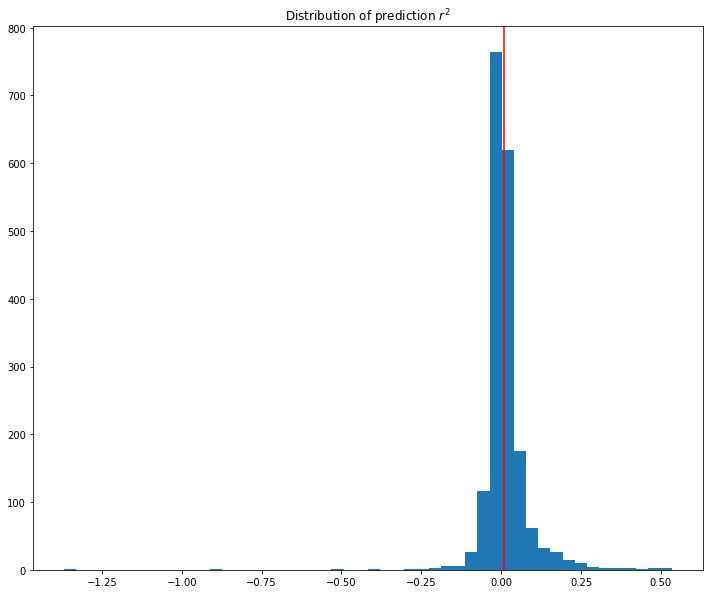

In [32]:
plt.figure(figsize=(12,10))
plt.hist(all_r2.values, bins=50)
plt.axvline(x=0.01,c='red')
plt.title("Distribution of prediction $r^2$")
plt.savefig('distr_of_tcga-brca_prediction_r2.png')

Text(0.5,1,'Distribution of prediction $r^2$')

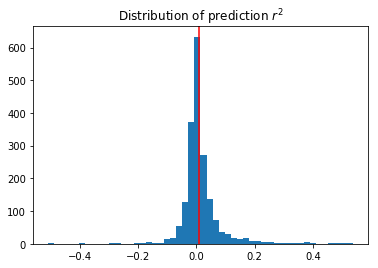

In [28]:
plt.hist(sorted(all_r2.iloc[:,0].values)[2:],bins=50)
plt.axvline(x=0.01,c='red')
plt.title("Distribution of prediction $r^2$")